# EDA+FE

1. Desarrollo de datasets
2. **Análisis exploratorio**
3. **Ingeniería de características**
4. Enternamiento y prueba de modelo

Realizo el analisis exploratorio del dataset desarrollado.

In [376]:
# Importo las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns


# Ajuste de funcion poly
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from matplotlib.pyplot import figure

#pd.set_option('display.max_rows', 500)
#pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 1000)

In [377]:
# Cargo el dataset
dataset_general = pd.read_csv('data/transform/dataset_ventas.csv')

In [378]:
dataset_general.shape

(230, 10)

In [379]:
dataset_general.columns

Index(['Unnamed: 0', 'año_mes', 'actos_coleg_esc', 'monto_cred_uva',
       'superficie', 'precio_prom_x', 'expectativa_inflacion_mediana',
       'tasas_interes_pm', 'tipo_cambio_implicito_en_adrs', 'precio_prom_y'],
      dtype='object')

In [380]:
dataset_general.head(500)

,Unnamed: 0,año_mes,actos_coleg_esc,monto_cred_uva,superficie,precio_prom_x,expectativa_inflacion_mediana,tasas_interes_pm,tipo_cambio_implicito_en_adrs,precio_prom_y
0,0,2002-01,1678.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2002-02,1557.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2002-03,3434.0,NaN,NaN,NaN,NaN,NaN,2.637099,NaN
3,3,2002-04,8035.0,NaN,NaN,NaN,NaN,NaN,2.996129,NaN
4,4,2002-05,8098.0,NaN,NaN,NaN,NaN,NaN,3.207032,NaN
...,...,...,...,...,...,...,...,...,...,...
225,225,2020-10,NaN,268427.0,NaN,NaN,45.0,37.000000,161.520028,NaN
226,226,2020-11,NaN,311425.0,NaN,NaN,40.0,36.933333,150.581070,NaN
227,227,2020-12,NaN,264095.0,NaN,NaN,30.0,38.000000,143.340031,NaN
228,228,2021-01,NaN,249395.0,NaN,NaN,45.0,38.000000,150.115573,NaN


In [381]:
# Borro columna que no aporta valor
dataset_general = dataset_general.drop('Unnamed: 0', 1)

In [382]:
# Notamos que no hay casi datos para momentos previos al 2010-01 y posteriores al 2019-08 con lo cual marco
# los limites de analisis en esos casi 10 años.
dataset_general = dataset_general.iloc[96:211].copy()

dataset_general.insert(0, 'Index', range(0, len(dataset_general)))

# Seteo index
dataset_general = dataset_general.set_index("año_mes")

In [383]:
dataset_general = dataset_general.rename(columns={"precio_prom_x":"precio_venta_m2",
                                                  "precio_prom_y":"precio_alquiler",
                                                 })

In [384]:
dataset_general["precio_alquiler_dolares"] = dataset_general["precio_alquiler"] / dataset_general["tipo_cambio_implicito_en_adrs"]

In [385]:
dataset_general.head(1)

,Index,actos_coleg_esc,monto_cred_uva,superficie,precio_venta_m2,expectativa_inflacion_mediana,tasas_interes_pm,tipo_cambio_implicito_en_adrs,precio_alquiler,precio_alquiler_dolares
año_mes,,,,,,,,,,
2010-01,0,3433.0,NaN,NaN,NaN,20.0,NaN,3.83548,NaN,NaN


In [386]:
dataset_general.describe()

,Index,actos_coleg_esc,monto_cred_uva,superficie,precio_venta_m2,expectativa_inflacion_mediana,tasas_interes_pm,tipo_cambio_implicito_en_adrs,precio_alquiler,precio_alquiler_dolares
count,115.000000,113.000000,3.900000e+01,73.000000,38.000000,115.000000,44.000000,115.000000,73.000000,73.000000
mean,57.000000,4042.415929,4.003012e+06,75948.095890,2236.425734,27.426087,38.316238,13.651881,8642.663379,470.381430
std,33.341666,1333.616925,3.951093e+06,22078.669813,386.762260,4.296185,15.364166,10.355011,4404.692550,97.657579
min,0.000000,1629.000000,2.075000e+03,46578.000000,1555.592233,20.000000,24.750000,3.835480,3116.114286,319.029819
25%,28.500000,3121.000000,9.815580e+05,60630.000000,2094.055442,25.000000,26.504032,6.112894,4629.642857,395.825643
50%,57.000000,3689.000000,2.627608e+06,67366.000000,2201.400075,30.000000,30.461012,11.882481,7569.619048,429.469091
75%,85.500000,5020.000000,5.820660e+06,85289.000000,2428.770034,30.000000,44.954685,15.650771,12377.666667,533.867853
max,114.000000,7861.000000,1.393723e+07,138079.000000,2903.775701,40.000000,71.924129,45.010039,17957.863636,687.438634


<ipython-input-387-3d1d1162391f>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(dataset_general.index, rotation = 90)


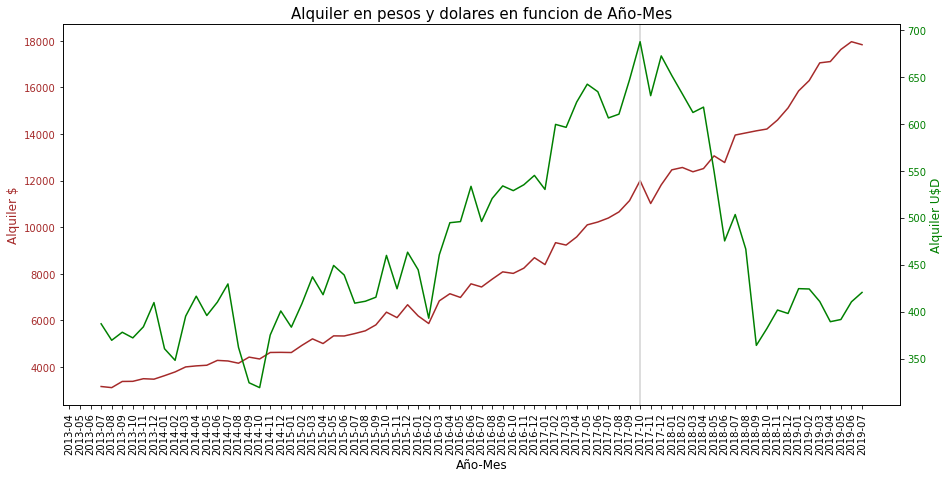

In [387]:
# Defino fig:
fig, ax = plt.subplots(figsize=(15,7))

# El precio en $ del alquiler
ax.plot(dataset_general["precio_alquiler"], color='brown')
ax.tick_params(axis='y', labelcolor='brown')

# Generate a new Axes instance, on the twin-X axes (same position)
ax2 = ax.twinx()

# El precio del U$D del alquiler
ax2.plot(dataset_general["precio_alquiler_dolares"], color='green')
ax2.tick_params(axis='y', labelcolor='green')

ax.set_xticklabels(dataset_general.index, rotation = 90)
ax.set_title('Alquiler en pesos y dolares en funcion de Año-Mes', fontsize=15)
ax.set_xlabel('Año-Mes', fontsize=12)
ax.set_ylabel('Alquiler $', color='brown', fontsize=12)
ax2.set_ylabel('Alquiler U$D', color='green', fontsize=12)

ax.axvline("2017-10", 0, 18000, label='pyplot vertical line',color="lightgrey")

plt.show()

In [388]:
# En este primer grafico podemos ver que el valor de los precios de los alquileres en dólares aumenta 
# (de manera progresiva) hasta llegar a su pico máximo en octubre del 2017. Luego se derrumba a valores del año 2014.

In [389]:
# Esto parecería estar relacionado con un aumento del dólar que no pudo ser trasladado al precio del alquiler.

<ipython-input-390-050a67cc7c44>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(dataset_general["tipo_cambio_implicito_en_adrs"].iloc[39:115].index, rotation = 90)


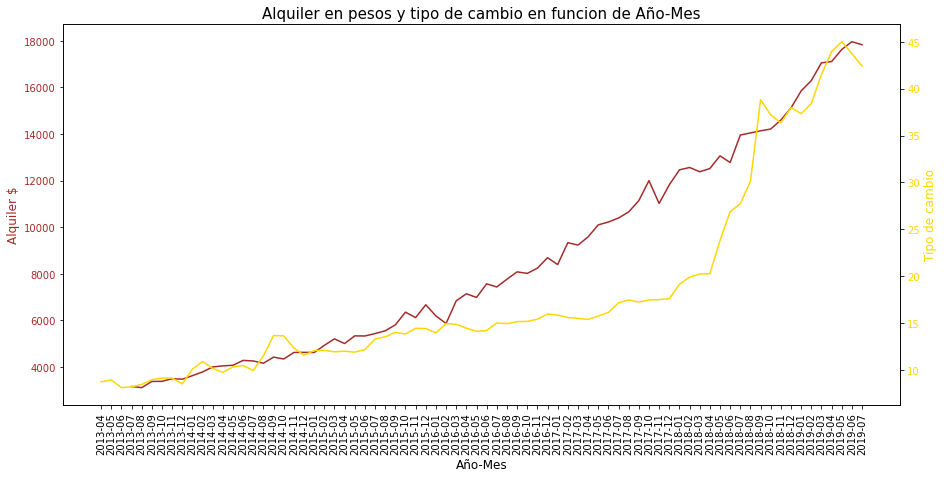

In [390]:
# Defino fig:
fig, ax = plt.subplots(figsize=(15,7))

# Precio del alquiler en $
ax.plot(dataset_general["precio_alquiler"].iloc[39:115], color='brown')
ax.tick_params(axis='y', labelcolor='brown')

# Generate a new Axes instance, on the twin-X axes (same position)
ax2 = ax.twinx()


# El tipo de cambio
ax2.plot(dataset_general["tipo_cambio_implicito_en_adrs"].iloc[39:115], color='gold')
ax2.tick_params(axis='y', labelcolor='gold')

ax.set_xticklabels(dataset_general["tipo_cambio_implicito_en_adrs"].iloc[39:115].index, rotation = 90)

ax.set_title('Alquiler en pesos y tipo de cambio en funcion de Año-Mes', fontsize=15)
ax.set_xlabel('Año-Mes', fontsize=12)
ax.set_ylabel('Alquiler $', color='brown', fontsize=12)
ax2.set_ylabel('Tipo de cambio', color='gold', fontsize=12)

plt.show()

In [391]:
# Podemos validar la premisa anterior. La aceleración del valor del dólar es mucho mayor. Existe un retardo significativo en 
# el mercado en la corrección de los alquileres en $.

In [392]:
# Vamos a visualizar ahora la relación que existe entre los montos en créditos UVA y la cantidad de compra-ventas que hubo. Para
# evaluar el impacto de la política

<ipython-input-393-cf7cb75e7e4a>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(dataset_general["monto_cred_uva"].iloc[39:115].index, rotation = 90)


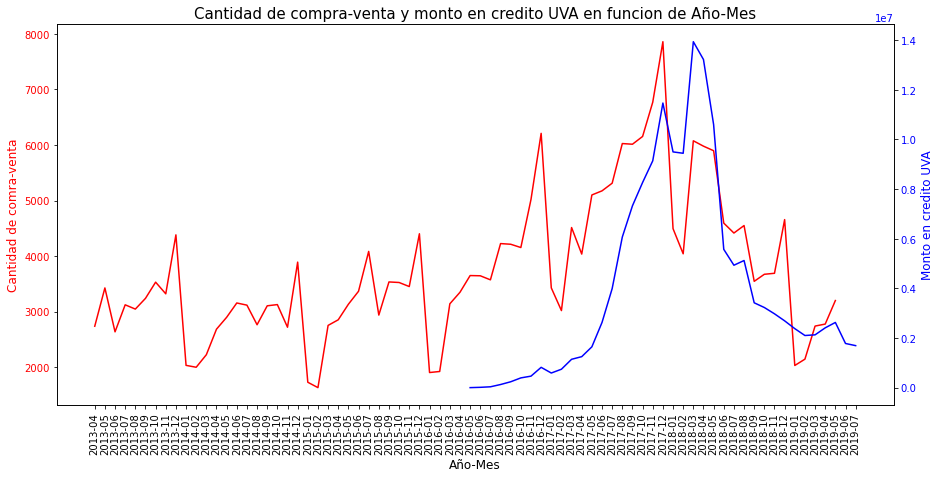

In [393]:
# Defino fig:
fig, ax = plt.subplots(figsize=(15,7))

# Cantidad de compra-ventas
ax.plot(dataset_general["actos_coleg_esc"].iloc[39:115], color='red')
ax.tick_params(axis='y', labelcolor='red')

# Generate a new Axes instance, on the twin-X axes (same position)
ax2 = ax.twinx()

# Cantidad de prestamos en UVA
ax2.plot(dataset_general["monto_cred_uva"].iloc[39:115], color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

ax.set_xticklabels(dataset_general["monto_cred_uva"].iloc[39:115].index, rotation = 90)

ax.set_title('Cantidad de compra-venta y monto en credito UVA en funcion de Año-Mes', fontsize=15)
ax.set_xlabel('Año-Mes', fontsize=12)
ax.set_ylabel('Cantidad de comra-venta', color='red', fontsize=12)
ax2.set_ylabel('Monto en credito UVA', color='blue', fontsize=12)

plt.show()

In [394]:
# En primer lugar podemos notar una marcada estacionalidad en la compra-venta de inmuebles. En los meses de enero y febrero
# habitualmente la cantidad de ventas es inferior. 
# Lo segundo que podemos visualizar es el repunte que existió con el beneficio del crédito UVA. Aumento significativamente,
# pero ¿Cuánto? Vamos a intentar estimarlo:

In [395]:
# Vamos a dividir el dataset en dos partes y evaluar la distribución de ventas de inmuebles para momentos previos y posteriores
# a la medida:

In [396]:
dataset_general["uva"] = 0
dataset_general.loc[(dataset_general["monto_cred_uva"].isnull() ), "uva"] = "NO"
dataset_general.loc[(dataset_general["uva"] == 0 ), "uva"] = "SI"

[Text(0.5, 1.0, 'Distribucion de compra-venta antes y despues de la politica'),
 Text(0.5, 0, 'UVA'),
 Text(0, 0.5, 'Compra-ventas')]

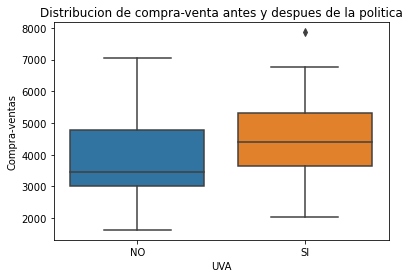

In [397]:
sns.boxplot(x="uva", y="actos_coleg_esc", data=dataset_general).set(title='Distribucion de compra-venta antes y despues de la politica', xlabel='UVA', ylabel='Compra-ventas')


In [398]:
# Obtengo las medianas:
dataset_general.groupby("uva")["actos_coleg_esc"].mean().to_frame()

,actos_coleg_esc
uva,
NO,3818.776316
SI,4501.783784


In [399]:
# En el boxplot visualizamos que el aumento producido por la política no es tan significativo como parecía.
# Ósea, si bien la política genero un impacto importante (del orden de 700 ventas mas promedio por mes), 
# la realidad es que son valores similares a los valores de compra-venta anteriores.

In [400]:
# Ahora vamos a analizar si existe relación entre la superficie en alquiler y el precio de los alquileres

<ipython-input-401-ab9ee2861bcf>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(dataset_general.index, rotation = 90)


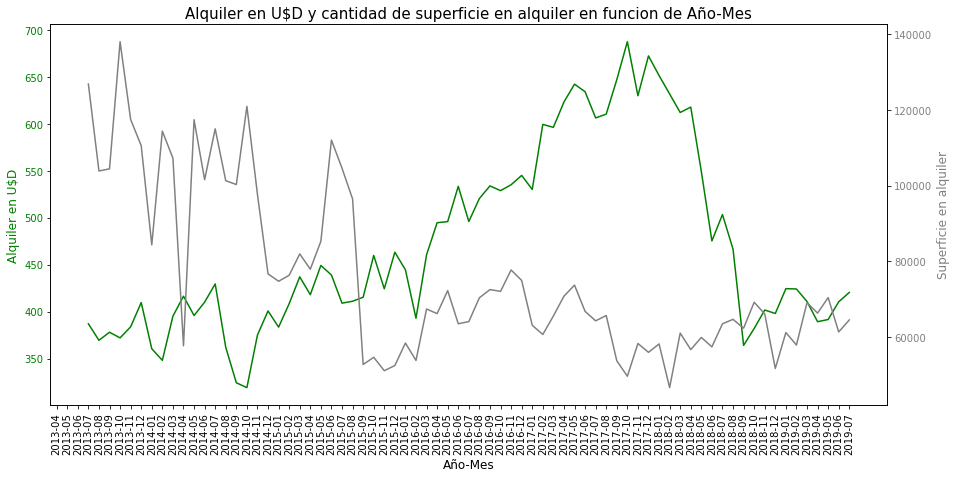

In [401]:
# Defino fig:
fig, ax = plt.subplots(figsize=(15,7))

# Precio de alquiler en U$D
ax.plot(dataset_general["precio_alquiler_dolares"], color='green')
ax.tick_params(axis='y', labelcolor='green')

# Generate a new Axes instance, on the twin-X axes (same position)
ax2 = ax.twinx()

# Superficies en alquiler
ax2.plot(dataset_general["superficie"], color='gray')
ax2.tick_params(axis='y', labelcolor='gray')

ax.set_xticklabels(dataset_general.index, rotation = 90)

ax.set_title('Alquiler en U$D y cantidad de superficie en alquiler en funcion de Año-Mes', fontsize=15)
ax.set_xlabel('Año-Mes', fontsize=12)
ax.set_ylabel('Alquiler en U$D', color='green', fontsize=12)
ax2.set_ylabel('Superficie en alquiler', color='gray', fontsize=12)

plt.show()

In [402]:
# Aquí podemos ver dos etapas. La primera, previa a la devaluación de 2018, tenemos una relación inversa. A menor
# cantidad de metros mayores disponibles, precios más altos. Sin embargo, esta relación sufre una ruptura durante el proceso
# devaluatorio citado.

In [403]:
# Para analizar y visualizar el precio de venta por m2 en dólares en función de otras variables necesito primero obtener
# los valores faltantes.
# Para estimarlas vamos a usar una función polinómica ajustada

poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

In [404]:
# Genero el dataset de entrenamiento filtrando nulos en la columna precio_venta_m2
dataset_train = dataset_general[(dataset_general["precio_venta_m2"].notnull())]

x = dataset_train["Index"]
y = dataset_train['precio_venta_m2']

# Realizo el fit
xfit = dataset_train["Index"]
poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

<ipython-input-404-3c2b00ae9650>:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  poly_model.fit(x[:, np.newaxis], y)
<ipython-input-404-3c2b00ae9650>:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  yfit = poly_model.predict(xfit[:, np.newaxis])


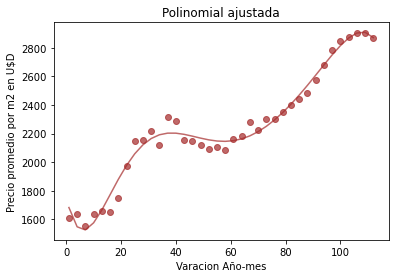

In [405]:
# Graficamos resultante.
plt.title('Polinomial ajustada')
plt.scatter(x, y, color='brown', alpha=0.7)
plt.xlabel('Varacion Año-mes')
plt.ylabel('Precio promedio por m2 en U$D')

plt.plot(xfit, yfit, color='brown', alpha=0.7);

In [406]:
# Defino la funcion utilizada para las predicciones
def poly_predict(x):
  """
    Precio de venta en dolares por mes
    @PARAM x = numero de mes
  """
  return poly_model.predict([[x]])[0]

In [407]:
# Realizo las predicciones sobre el dataset faltante para completarlo

In [408]:
# Reemplazo los nulos por 0
dataset_general['precio_venta_m2'] = dataset_general['precio_venta_m2'].replace(np.nan, 0)

In [409]:
# Reemplazo los 0 por las valores predict
for row in dataset_general.iterrows():
    index = row[1]["Index"]
    precio_venta_m2 = row[1]["precio_venta_m2"]
    if precio_venta_m2 == 0:
        precio_venta_m2_predict = poly_predict(index)
        dataset_general.loc[(dataset_general["Index"] == index ),"precio_venta_m2"] = precio_venta_m2_predict

In [410]:
dataset_general.head(3)

,Index,actos_coleg_esc,monto_cred_uva,superficie,precio_venta_m2,expectativa_inflacion_mediana,tasas_interes_pm,tipo_cambio_implicito_en_adrs,precio_alquiler,precio_alquiler_dolares,uva
año_mes,,,,,,,,,,,
2010-01,0,3433.0,NaN,NaN,1761.056489,20.0,NaN,3.835480,NaN,NaN,NO
2010-02,1,3331.0,NaN,NaN,1606.519481,25.0,NaN,3.864431,NaN,NaN,NO
2010-03,2,4958.0,NaN,NaN,1621.513188,25.0,NaN,3.899503,NaN,NaN,NO


In [411]:
# Ahora puedo seguir realizando el análisis en función del precio de venta

In [412]:
# Vamos a validar si existe relación entre el precio promedio del m2 en dólares y la cantidad de ventas

<ipython-input-413-734c4c86f534>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(dataset_general.index, rotation = 90, fontsize = 7)


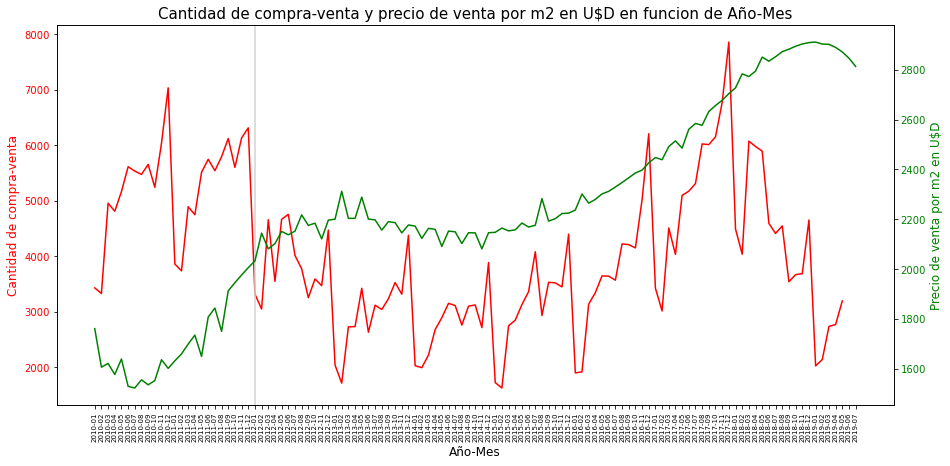

In [413]:
# Defino fig:
fig, ax = plt.subplots(figsize=(15,7))

# Cantidad de compra-venta
ax.plot(dataset_general["actos_coleg_esc"], color='red')
ax.tick_params(axis='y', labelcolor='red')

# Generate a new Axes instance, on the twin-X axes (same position)
ax2 = ax.twinx()

# Precio de venta por m2 en dolares
ax2.plot(dataset_general["precio_venta_m2"], color='green')
ax2.tick_params(axis='y', labelcolor='green')

ax.set_xticklabels(dataset_general.index, rotation = 90, fontsize = 7)


ax.set_title('Cantidad de compra-venta y precio de venta por m2 en U$D en funcion de Año-Mes', fontsize=15)
ax.set_xlabel('Año-Mes', fontsize=12)
ax.set_ylabel('Cantidad de compra-venta', color='red', fontsize=12)
ax2.set_ylabel('Precio de venta por m2 en U$D', color='green', fontsize=12)

ax.axvline("2012-01", 0, 18000, label='pyplot vertical line',color="lightgrey")

plt.show()

In [414]:
# Si bien parece haber cierta relación, particularmente del 2012 en adelante, diría que no es concluyente la misma. Ya que
# podemos ver para valores anteriores esto no se respeta. El dataset no es lo suficientemente amplio como para afirmar
# dicha conclusión.

In [415]:
# Vamos a validar si existe relación entre la cantidad de ventas y la expectativa de inflación e interés.

<ipython-input-416-131b421a1653>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(dataset_general.index, rotation = 90, fontsize = 7)


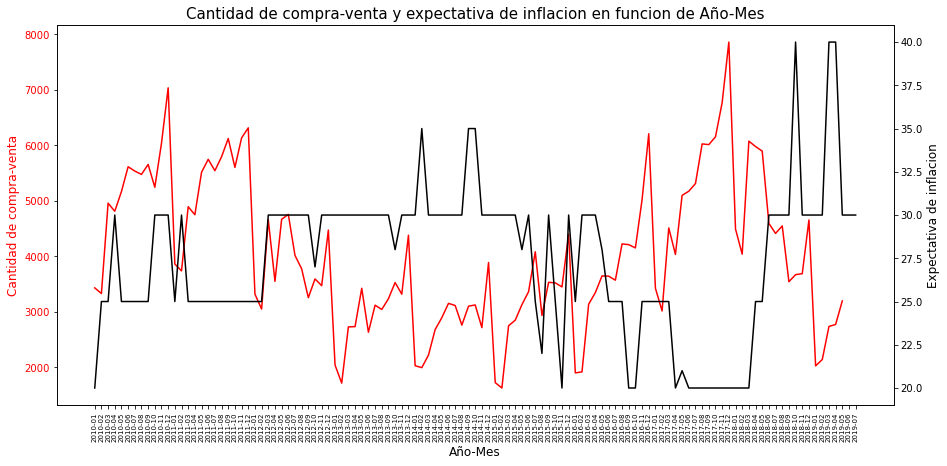

In [416]:
# Defino fig:
fig, ax = plt.subplots(figsize=(15,7))

# Cantidad de compra-venta
ax.plot(dataset_general["actos_coleg_esc"], color='red')
ax.tick_params(axis='y', labelcolor='red')

# Generate a new Axes instance, on the twin-X axes (same position)
ax2 = ax.twinx()

# Expectativa de inflacion
ax2.plot(dataset_general["expectativa_inflacion_mediana"], color='black')
ax2.tick_params(axis='y', labelcolor='black')

ax.set_xticklabels(dataset_general.index, rotation = 90, fontsize = 7)

ax.set_title('Cantidad de compra-venta y expectativa de inflacion en funcion de Año-Mes', fontsize=15)
ax.set_xlabel('Año-Mes', fontsize=12)
ax.set_ylabel('Cantidad de compra-venta', color='red', fontsize=12)
ax2.set_ylabel('Expectativa de inflacion', color='black', fontsize=12)

plt.show()

In [417]:
# Podemos notar que la relación es marcadamente inversa. Ocurren mayor cantidad de compra/venta en periodos de baja 
# inflación y viceversa.

<ipython-input-418-531db0345fbf>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(dataset_general["tasas_interes_pm"].iloc[39:115].index, rotation = 90)


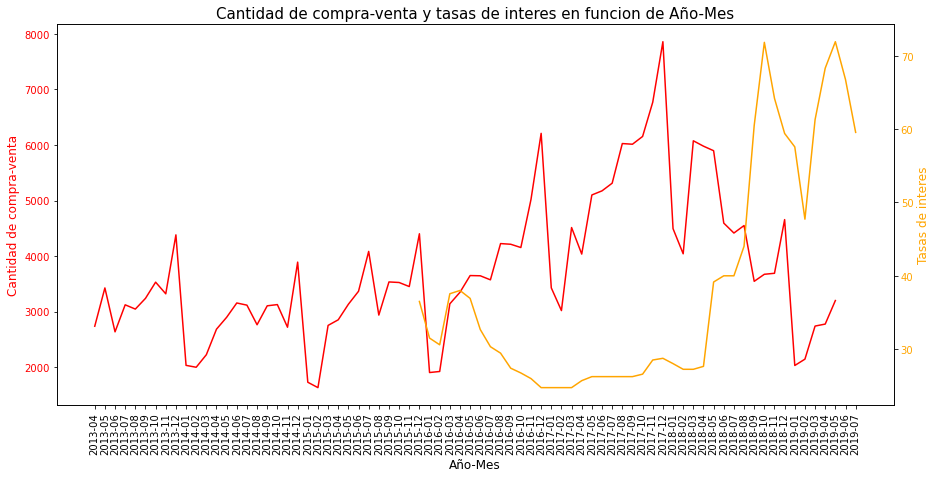

In [418]:
# Defino fig:
fig, ax = plt.subplots(figsize=(15,7))

# Cantidad de compra-venta
ax.plot(dataset_general["actos_coleg_esc"].iloc[39:115], color='red')
ax.tick_params(axis='y', labelcolor='red')

# Generate a new Axes instance, on the twin-X axes (same position)
ax2 = ax.twinx()

# Tasas de interes
ax2.plot(dataset_general["tasas_interes_pm"].iloc[39:115], color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

ax.set_xticklabels(dataset_general["tasas_interes_pm"].iloc[39:115].index, rotation = 90)

ax.set_title('Cantidad de compra-venta y tasas de interes en funcion de Año-Mes', fontsize=15)
ax.set_xlabel('Año-Mes', fontsize=12)
ax.set_ylabel('Cantidad de compra-venta', color='red', fontsize=12)
ax2.set_ylabel('Tasas de interes', color='orange', fontsize=12)

plt.show()

In [419]:
# Al igual que con la inflación parece haber una relación inversa. Cabe destacar igual que la tasa de interés a diferencia
# de la inflación puede ser controlada con mayor facilidad por el estado. Con lo cual es una regla blanda.
# También cabe recordar que durante la gestión macrista la tasa de interés quiso vencer a la expectativa de inflación, 
# generando una correlación entre ellas.

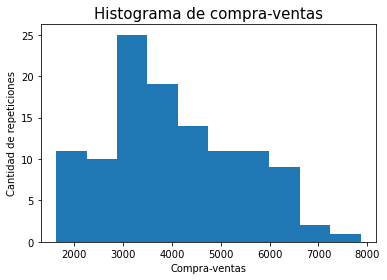

In [420]:
# Realizo un histograma del Target (compra-venta) para ver como se distribuye
plt.hist(dataset_general["actos_coleg_esc"], bins = 10)

plt.title('Histograma de compra-ventas', fontsize=15)
plt.xlabel('Compra-ventas')
plt.ylabel('Cantidad de repeticiones')

plt.show()

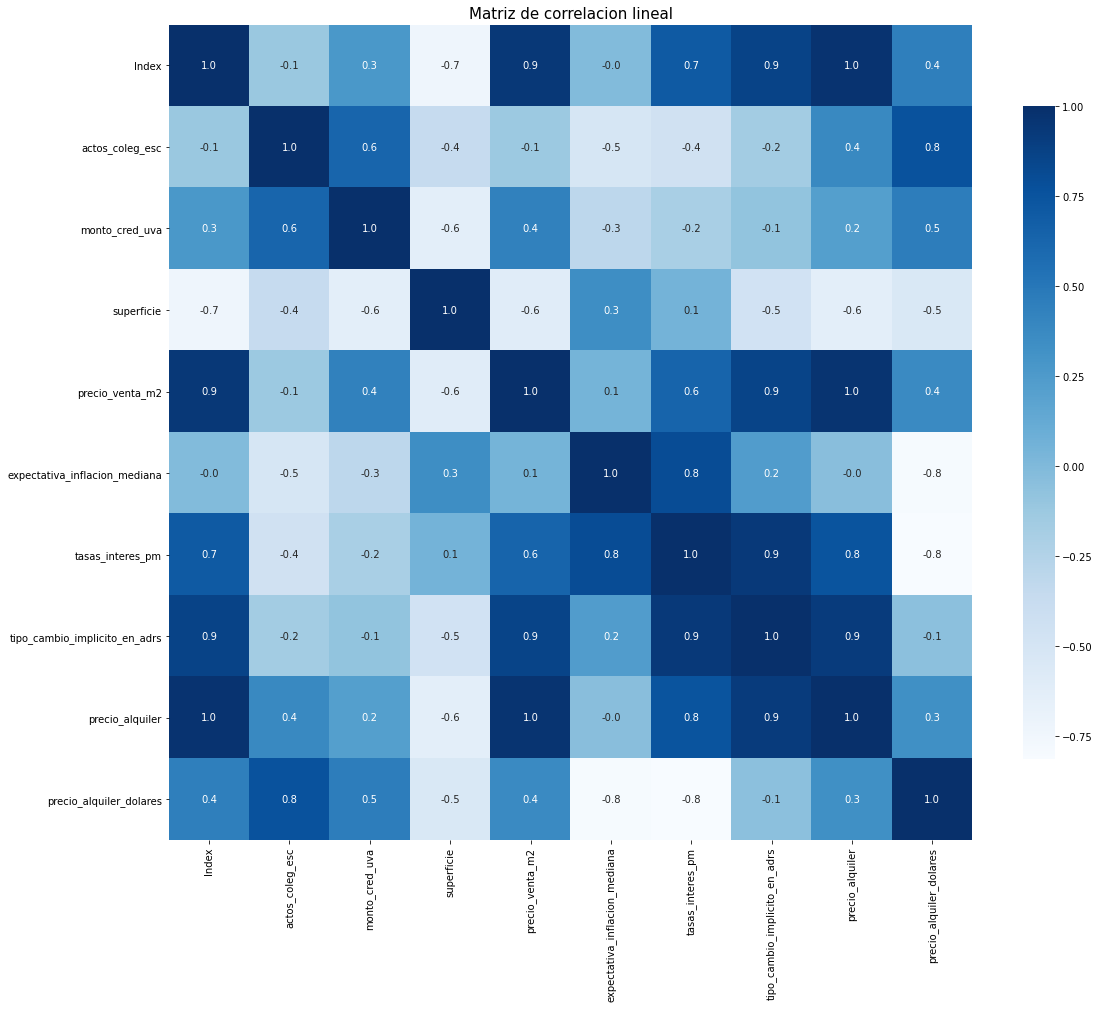

In [421]:
# Verifico si existe correlaciones lineales:
dataset_general_corr = dataset_general.corr()

fig, ax = plt.subplots(figsize=(18,15))

# plot heatmap
sns.heatmap(dataset_general_corr, annot=True, fmt=".1f", cmap='Blues', cbar_kws={"shrink": .8})
# yticks
plt.yticks(rotation=0)
plt.title('Matriz de correlacion lineal', fontsize=15)

plt.show()

In [422]:
# Notamos que existen buenas correlaciones lineales entre algunos de las features:
# Entre montos_cred_uva y actos_coleg_esc, tasa de interés y expectativa de inflación, entre otros.
# Tambien, entre tasa_interes_pm y actos_coleg_esc tenemos una correlación lineal negativa muy alta.

Realizamos la ingeniería de características faltante.

In [423]:
# Tomo el rango donde poseemos valores en todas las columnas:
dataset_general_fe = dataset_general[42:112].copy()

In [424]:
dataset_general_fe

,Index,actos_coleg_esc,monto_cred_uva,superficie,precio_venta_m2,expectativa_inflacion_mediana,tasas_interes_pm,tipo_cambio_implicito_en_adrs,precio_alquiler,precio_alquiler_dolares,uva
año_mes,,,,,,,,,,,
2013-07,42,3121.0,NaN,126882.0,2197.955607,30.0,NaN,8.176365,3164.230769,386.997250,NO
2013-08,43,3044.0,NaN,103881.0,2156.769231,30.0,NaN,8.434407,3116.114286,369.452667,NO
2013-09,44,3237.0,NaN,104452.0,2190.681192,30.0,NaN,8.943943,3380.944444,378.014975,NO
2013-10,45,3529.0,NaN,138079.0,2186.428252,28.0,NaN,9.102674,3386.259259,372.007083,NO
2013-11,46,3319.0,NaN,117513.0,2145.580000,30.0,NaN,9.115745,3498.634146,383.801251,NO
...,...,...,...,...,...,...,...,...,...,...,...
2018-12,107,4656.0,2692428.0,51644.0,2909.418123,30.0,59.408355,37.982778,15117.000000,397.996169,SI
2019-01,108,2028.0,2378753.0,61151.0,2911.492604,30.0,57.578677,37.335606,15847.055556,424.448865,SI
2019-02,109,2142.0,2101543.0,57844.0,2903.584906,30.0,47.721964,38.412000,16290.222222,424.092006,SI


In [425]:
# Reemplazo los nulos de monto cred uva por 0, ya que en ese momento no existia dicha politica
dataset_general_fe["monto_cred_uva"].fillna( 0 , inplace = True)

In [426]:
# Reemplazo la columna uva el Si por 1 y No por 0.
dataset_general_fe["uva"].replace({"SI": 1, "NO": 0}, inplace=True)

In [427]:
# Completo las tasas de interes faltantes con datos de otra bibliografia:
# https://repositorio.cepal.org/bitstream/handle/11362/36970/32/Argentina_es.pdf
# La tasa de interes promedio en el 2013 era de 17.14%.
# La tasa de interes promedio en el 2014 era de 24%.
# La tasa de interes promedio en el 2015 era de 24.9%.

In [428]:
dataset_general_fe.loc[(dataset_general_fe.index.str[0:4] == "2013" ), "tasas_interes_pm"] = 17.14
dataset_general_fe.loc[(dataset_general_fe.index.str[0:4] == "2014" ), "tasas_interes_pm"] = 24
dataset_general_fe.loc[(dataset_general_fe.index.str[0:4] == "2015" ), "tasas_interes_pm"] = 24.9

In [429]:
# Voy a dropear la variacion del dolar y el valor prom en pesos del alquiler. Solo me voy a quedar con valores dolarizados
dataset_general_fe = dataset_general_fe.drop('tipo_cambio_implicito_en_adrs', 1)
dataset_general_fe = dataset_general_fe.drop('precio_alquiler', 1)

In [430]:
# Para marcarle la estacionalidad al algoritmo vamos a agregar un input mes. Este va estar compuesto por un int
# que tomara un valor absoluto relacionado con la cantidad de ventas de ese mes con respecto a los otros.
dataset_general_fe["mes"] = dataset_general_fe.index.str[5:7]

In [431]:
dataset_general_fe.groupby("mes")["actos_coleg_esc"].mean().to_frame().sort_values(by='actos_coleg_esc', ascending=False)

,actos_coleg_esc
mes,
12,5233.166667
11,4161.000000
05,4134.400000
10,4025.833333
06,3986.000000
09,3940.500000
07,3936.000000
08,3923.500000
04,3611.333333


In [432]:
mapping_mes_weight={
    "12":12,
    "11":11,
    "05":10,
    "10":9,
    "06":8,
    "09":7,
    "07":6,
    "08":5,
    "04":4,
    "03":3,
    "01":2,
    "02":1
}

In [433]:
dataset_general_fe['mes'] = dataset_general_fe['mes'].map(mapping_mes_weight)

In [434]:
dataset_general_fe = dataset_general_fe.reset_index()
dataset_general_fe = dataset_general_fe.drop('año_mes', 1)
dataset_general_fe = dataset_general_fe.drop('Index', 1)

In [435]:
dataset_general_fe.describe()

,actos_coleg_esc,monto_cred_uva,superficie,precio_venta_m2,expectativa_inflacion_mediana,tasas_interes_pm,precio_alquiler_dolares,uva,mes
count,70.000000,7.000000e+01,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,3791.085714,2.143081e+06,76400.500000,2419.832704,27.385714,30.583031,473.077388,0.514286,6.428571
std,1313.297628,3.578771e+06,22427.533556,283.522262,5.077067,12.557838,98.823154,0.503405,3.495635
min,1629.000000,0.000000e+00,46578.000000,2081.500000,20.000000,17.140000,319.029819,0.000000,1.000000
25%,2956.250000,0.000000e+00,60048.750000,2169.937560,25.000000,24.187500,396.368275,0.000000,3.250000
50%,3531.000000,8.161000e+03,68212.500000,2307.215850,30.000000,25.841667,437.979816,1.000000,6.000000
75%,4473.250000,2.676400e+06,93693.500000,2672.547604,30.000000,30.526196,534.780425,1.000000,9.000000
max,7861.000000,1.393723e+07,138079.000000,2911.492604,40.000000,71.835000,687.438634,1.000000,12.000000


In [436]:
dataset_general_fe

,actos_coleg_esc,monto_cred_uva,superficie,precio_venta_m2,expectativa_inflacion_mediana,tasas_interes_pm,precio_alquiler_dolares,uva,mes
0,3121.0,0.0,126882.0,2197.955607,30.0,17.140000,386.997250,0,6
1,3044.0,0.0,103881.0,2156.769231,30.0,17.140000,369.452667,0,5
2,3237.0,0.0,104452.0,2190.681192,30.0,17.140000,378.014975,0,7
3,3529.0,0.0,138079.0,2186.428252,28.0,17.140000,372.007083,0,9
4,3319.0,0.0,117513.0,2145.580000,30.0,17.140000,383.801251,0,11
...,...,...,...,...,...,...,...,...,...
65,4656.0,2692428.0,51644.0,2909.418123,30.0,59.408355,397.996169,1,12
66,2028.0,2378753.0,61151.0,2911.492604,30.0,57.578677,424.448865,1,2
67,2142.0,2101543.0,57844.0,2903.584906,30.0,47.721964,424.092006,1,1
68,2738.0,2128531.0,69059.0,2902.487193,40.0,61.287355,410.731620,1,3


In [437]:
dataset_general_fe.to_csv("data/fe/dataset_fe.csv")